## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [22]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx", index_col=0)
df
# check how many missing values we have
df.isna().sum()

X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [79]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat', 'long',
       'price_unit_area'],
      dtype='object')

In [81]:
selected = ["lat", "long"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#df_drop = df.rename(columns=selected)
df_rename.drop(columns=selected)


,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
No,,,,
1,32.0,"""84.87882""",100.0,37.9
2,19.5,"""306.5947""",9.0,42.2
3,13.3,"""561.9845""",5.0,47.3
4,13.3,"""561.9845""",5.0,54.8
5,5.0,"""390.5684""",5.0,43.1
...,...,...,...,...
410,13.7,"""4082.015""",0.0,15.4
411,5.6,"""90.45606""",9.0,50.0
412,18.8,"""390.9696""",7.0,40.6


In [99]:
# remove quotes from sample 
df_drop=df
df_drop=df_drop.rename(columns=rename_dict)
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"]=df_drop.distance_to_mrt.astype(float)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   house_age               403 non-null    float64
 1   distance_to_mrt         414 non-null    float64
 2   num_convenience_stores  413 non-null    float64
 3   lat                     414 non-null    float64
 4   long                    414 non-null    float64
 5   price_unit_area         414 non-null    float64
dtypes: float64(6)
memory usage: 22.6 KB


In [100]:
# check current "shape" of dataframe
df_drop.shape

(414, 6)

In [101]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df_drop=df_drop.dropna(axis=0)
# check shape again
df_drop.shape

(403, 6)

In [102]:
df_drop

,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
No,,,,,,
1,32.0,84.87882,100.0,24.98298,121.54024,37.9
2,19.5,306.59470,9.0,24.98034,121.53951,42.2
3,13.3,561.98450,5.0,24.98746,121.54391,47.3
4,13.3,561.98450,5.0,24.98746,121.54391,54.8
5,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...
410,13.7,4082.01500,0.0,24.94155,121.50381,15.4
411,5.6,90.45606,9.0,24.97433,121.54310,50.0
412,18.8,390.96960,7.0,24.97923,121.53986,40.6


## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [103]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_drop.describe()

,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,18.607196,1070.118896,4.292804,24.969040,121.533590,38.106452
std,22.656541,1255.001088,5.636027,0.012365,0.015250,13.610588
min,0.000000,23.382840,-6.000000,24.932070,121.473530,7.600000
25%,8.700000,289.324800,1.000000,24.963010,121.529665,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538740,38.600000
75%,28.300000,1442.932500,6.000000,24.977440,121.543395,46.600000
max,410.300000,6488.021000,100.000000,25.014590,121.566270,117.500000


In [106]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl

,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
No,,,,,,
1,32.0,84.87882,100.0,24.98298,121.54024,37.9
2,19.5,306.59470,9.0,24.98034,121.53951,42.2
3,13.3,561.98450,5.0,24.98746,121.54391,47.3
4,13.3,561.98450,5.0,24.98746,121.54391,54.8
5,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...
410,13.7,4082.01500,0.0,24.94155,121.50381,15.4
411,5.6,90.45606,9.0,24.97433,121.54310,50.0
412,18.8,390.96960,7.0,24.97923,121.53986,40.6


In [112]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl.num_convenience_stores>=4.29]
df_outl

,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
No,,,,,,
1,32.0,84.87882,100.0,24.98298,121.54024,37.9
2,19.5,306.59470,9.0,24.98034,121.53951,42.2
3,13.3,561.98450,5.0,24.98746,121.54391,47.3
4,13.3,561.98450,5.0,24.98746,121.54391,54.8
5,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...
407,1.9,372.13860,7.0,24.97293,121.54026,40.5
411,5.6,90.45606,9.0,24.97433,121.54310,50.0
412,18.8,390.96960,7.0,24.97923,121.53986,40.6


In [ ]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

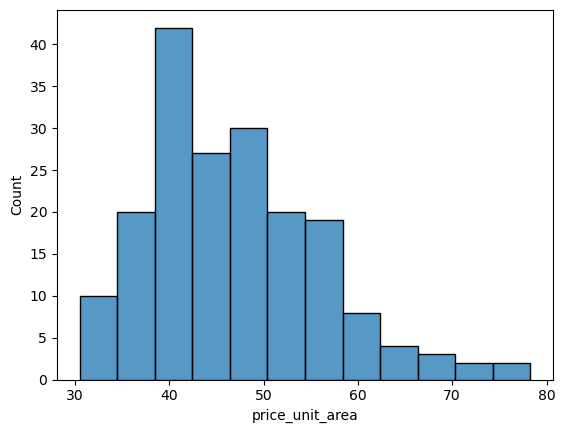

In [113]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["price_unit_area"])
plt.show()

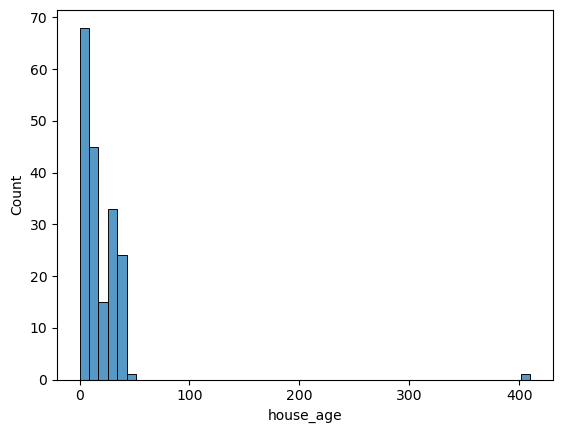

In [114]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["house_age"])
plt.show()

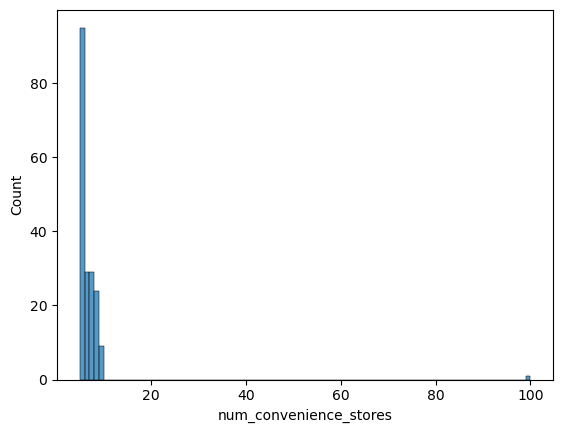

In [115]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["num_convenience_stores"])
plt.show()

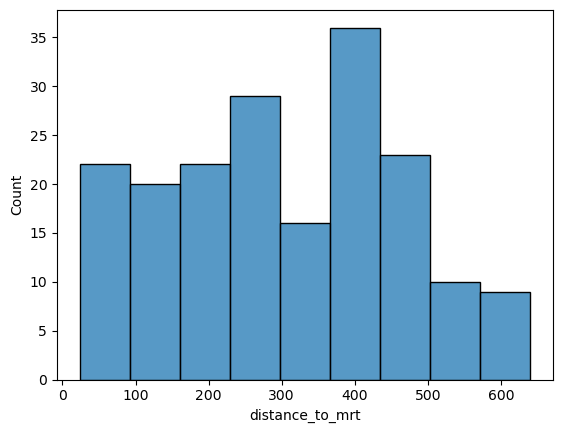

In [116]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["distance_to_mrt"])
plt.show()

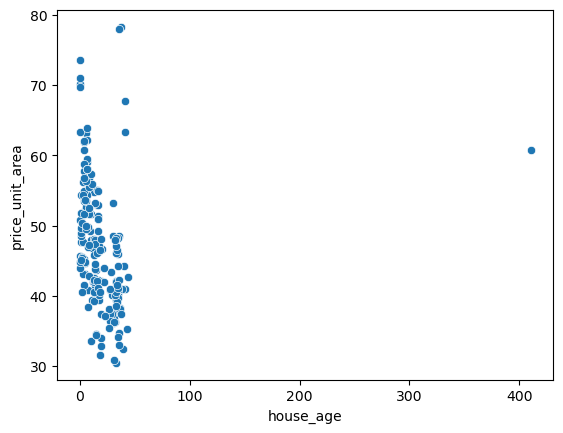

In [120]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="house_age", y="price_unit_area")
plt.show()

In [119]:
df_outl

,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
No,,,,,,
1,32.0,84.87882,100.0,24.98298,121.54024,37.9
2,19.5,306.59470,9.0,24.98034,121.53951,42.2
3,13.3,561.98450,5.0,24.98746,121.54391,47.3
4,13.3,561.98450,5.0,24.98746,121.54391,54.8
5,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...
407,1.9,372.13860,7.0,24.97293,121.54026,40.5
411,5.6,90.45606,9.0,24.97433,121.54310,50.0
412,18.8,390.96960,7.0,24.97923,121.53986,40.6


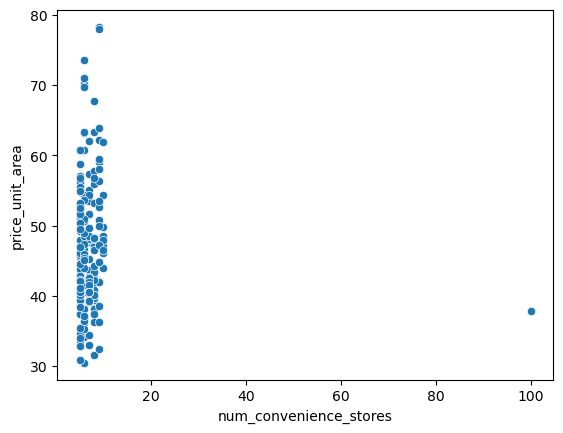

In [121]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area")
plt.show()

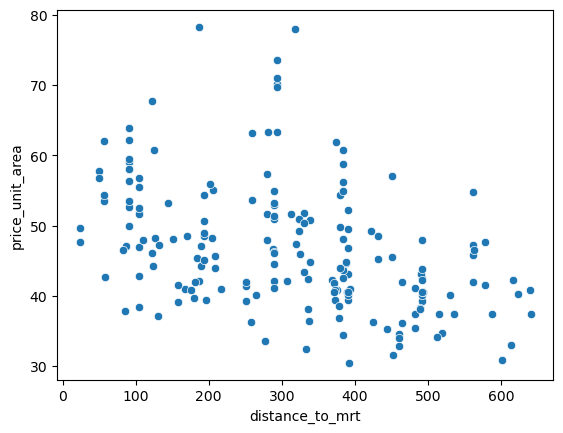

In [122]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="distance_to_mrt", y="price_unit_area")
plt.show()

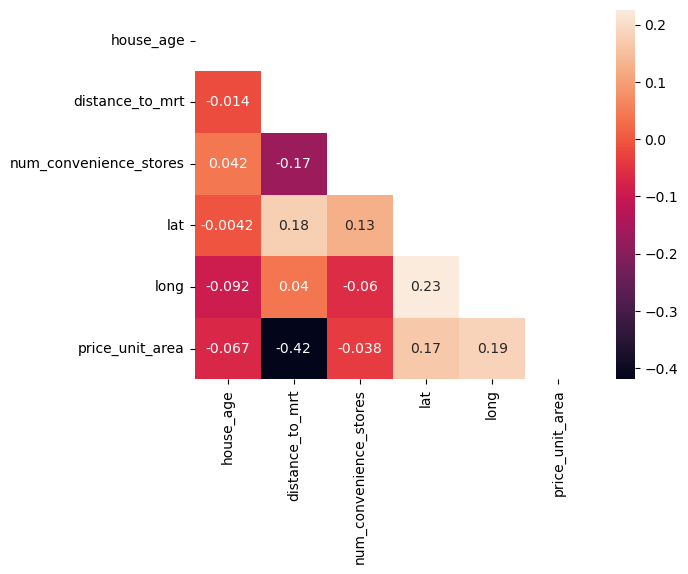

In [124]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [125]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)